# Loading libraries
We are using Pandas, Numpy, Seaborn and matplot mainly.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Dataframe
We are using allProbIntensities.tsv as a source file for our dataframe which contains all the RNA-seq data

In [2]:
# importing data
rnaseq_df = pd.read_csv('../data/allProbIntensities.tsv', sep='\t')

In [3]:
print(f'rnaseq_df shape: {rnaseq_df.shape}') 

rnaseq_df shape: (44708, 500)


In [4]:
rnaseq_df.head()
# We need to check what the hell is Reporter.Identifier

,Reporter.Identifier,GeneSymbols,NB001,NB002,NB003,NB004,NB005,NB006,NB007,NB008,...,NB489,NB490,NB491,NB492,NB493,NB494,NB495,NB496,NB497,NB498
0,28913,NaN,14.99,14.94,12.48,14.63,11.89,15.09,13.07,12.00,...,13.62,13.03,14.98,13.36,13.90,13.00,13.79,14.70,14.03,12.31
1,27262,NaN,9.20,10.41,9.27,8.83,7.97,10.33,9.62,8.72,...,6.26,5.93,6.97,5.99,7.62,7.76,8.56,7.74,7.57,7.08
2,3180,NaN,5.06,5.26,6.45,2.89,2.00,4.80,3.05,6.39,...,0.93,0.58,1.26,1.38,3.49,2.07,2.26,2.29,2.63,2.54
3,41426,MBL1P,7.45,8.68,6.30,7.30,6.26,7.50,7.43,6.98,...,5.35,5.57,5.51,6.30,6.60,6.38,7.49,6.77,8.13,7.11
4,37033,NaN,6.74,6.63,6.75,6.20,6.57,6.01,6.78,4.80,...,4.58,4.61,3.54,4.55,4.20,7.16,7.07,5.07,6.28,6.34


# Null values
We will analyse null values in our dataset. There are null values linked to GeneSymbols and the sample data (NB001...NB498) and we will treat those null values differently.

In [5]:
# We are analysing null values
rnaseq_df.isnull().sum()



Reporter.Identifier        0
GeneSymbols            34860
NB001                   1417
NB002                   1417
NB003                   1417
                       ...  
NB494                   1417
NB495                   1417
NB496                   1417
NB497                   1417
NB498                   1417
Length: 500, dtype: int64

We can observe that we have 34860 GeneSymbols values that are null. Which means that we are not able to identify those genes. Whoever these values can be useful for our prediction and we will not discard them. However, we should discard the 1417 null values for the sample data (NB001...NB498)

In [6]:
null_NB001_row_indices = rnaseq_df[rnaseq_df['NB001'].isnull()].index
print(null_NB001_row_indices)

rnaseq_df.loc[21]

Int64Index([   21,    50,    82,    97,   112,   117,   121,   154,   164,
              180,
            ...
            44405, 44492, 44494, 44572, 44610, 44643, 44649, 44658, 44671,
            44672],
           dtype='int64', length=1417)


Reporter.Identifier    45135
GeneSymbols              NaN
NB001                    NaN
NB002                    NaN
NB003                    NaN
                       ...  
NB494                    NaN
NB495                    NaN
NB496                    NaN
NB497                    NaN
NB498                    NaN
Name: 21, Length: 500, dtype: object

# Removing null values

To explore our data, we will prepare two different dataframes. One where we only clean `NB` null values. We will call this `full_rna_seq_df` and other where we are also cleaning the null values coming from `GeneSymbols`. That one will be called `gs_rnaseq_df`

In [7]:
# Create a boolean mask for rows where any column except 'GeneSymbols' has a null value
mask = rnaseq_df.drop(columns=['GeneSymbols']).isnull().any(axis=1)

# Drop rows where the mask is True
full_rna_seq_df = rnaseq_df[~mask]

null_gene_symbols = rnaseq_df['GeneSymbols'].isnull()
gs_rnaseq_df = rnaseq_df[~null_gene_symbols]

# Optionally, print the shape of the cleaned DataFrame to verify the number of rows removed
print(f'Cleaned DataFrame shape: {gs_rnaseq_df.shape}')

Cleaned DataFrame shape: (9848, 500)


# Data analysis

/var/folders/z1/bq1nnr3j77jgjmgx4h43lnth0000gn/T/ipykernel_15690/4292342461.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = gs_rnaseq_df.corr()


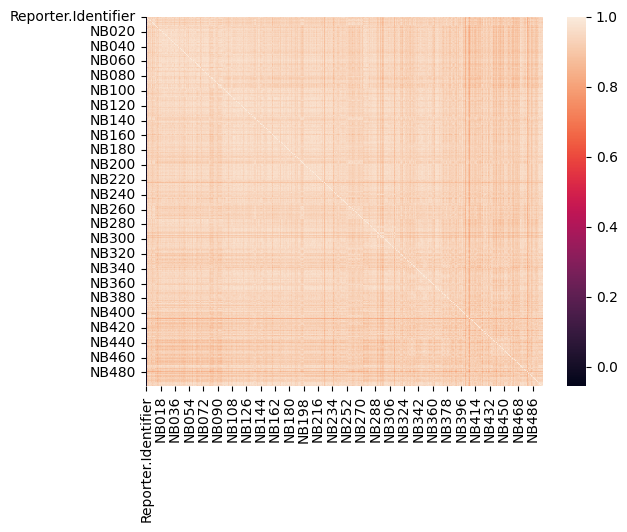

In [8]:
# Calculate correlation directly
corr = gs_rnaseq_df.corr() 

# Heatmap  
sns.heatmap(corr)
plt.savefig('corr_heatmap.png')

# Importing patient data

In [9]:
#importing patientInfo.tsv
patientInfo_df = pd.read_csv('../data/patientInfo.tsv', sep='\t')
patientInfo_train_df = pd.read_csv('../data/patientInfo_train.tsv', sep='\t')
print(f'patientInfo_df shape: {patientInfo_df.shape} \n patientInfo_train shape: {patientInfo_train_df.shape}')


patientInfo_df shape: (498, 7) 
 patientInfo_train shape: (249, 7)


In [10]:
# Define the mapping of old column names to new column names
column_mapping = {
    'ID ': 'ID',
    'FactorValue..Sex.': 'sex',
    'FactorValue..age.at.diagnosis': 'age',
    'FactorValue..death.from.disease': 'death',
    'FactorValue..high.risk': 'risk',
    'FactorValue..inss.stage': 'INSS',
    'FactorValue..progression': 'progression'
}

# Rename the columns
patientInfo_train_df = patientInfo_train_df.rename(columns=column_mapping)


In [11]:
#Remove reporter.identifier
gs_rnaseq_df_transpose = gs_rnaseq_df.drop('Reporter.Identifier', axis=1)
gs_rnaseq_df_transpose.set_index('GeneSymbols', inplace=True)
gs_rnaseq_df_transpose.head()

# # Transpose the DataFrame
transposed_df = gs_rnaseq_df_transpose.T

# Reset index to make it a column 
transposed_df = transposed_df.reset_index()
transposed_df = transposed_df.rename(columns={'index':'ID'}) 
transposed_df.head()

GeneSymbols,ID,MBL1P,STK24,ARPC5,TSPAN15,PADI2,IFT81,CENPP,SNRPD1,ICAM5,...,GRAP2,NIM1K,DPH7,GDF6,IL18BP,PTPN18,PRSS53,CLIC4,PDE3B,LINC01588
0,NB001,7.45,12.14,12.22,11.35,3.19,7.69,10.14,11.98,5.30,...,5.55,10.17,6.95,10.32,8.45,12.56,12.24,9.11,13.37,7.89
1,NB002,8.68,12.36,12.48,10.24,4.96,8.64,10.74,12.78,6.34,...,8.73,10.95,8.15,12.11,8.67,13.20,11.94,9.95,10.52,9.69
2,NB003,6.30,11.72,11.73,11.00,5.43,7.93,8.78,10.98,8.27,...,6.45,9.08,6.33,10.32,8.60,13.78,11.83,7.51,10.85,7.84
3,NB004,7.30,11.31,12.33,10.83,3.22,8.36,7.22,12.21,10.19,...,6.49,10.17,6.86,11.31,8.00,13.65,11.38,8.54,10.04,8.20
4,NB005,6.26,10.90,11.91,10.03,3.32,8.42,8.49,11.49,8.67,...,5.69,8.99,6.41,10.36,7.93,13.58,11.96,8.34,11.10,7.41


In [12]:
# Assuming transposed_df is your DataFrame

# Store the original 'ID' column
original_ID = transposed_df['ID'].copy()

# Perform the string replacement operation
transposed_df['ID'] = transposed_df['ID'].str.replace(r'NB(\d+)_.*', r'NB\1', regex=True)

# Compare the original 'ID' column with the modified 'ID' column to find the rows affected
rows_affected = (original_ID != transposed_df['ID']).sum()

print("Number of rows affected:", rows_affected)

Number of rows affected: 0


In [13]:
transposed_df.head

<bound method NDFrame.head of GeneSymbols     ID  MBL1P  STK24  ARPC5  TSPAN15  PADI2  IFT81  CENPP  SNRPD1  \
0            NB001   7.45  12.14  12.22    11.35   3.19   7.69  10.14   11.98   
1            NB002   8.68  12.36  12.48    10.24   4.96   8.64  10.74   12.78   
2            NB003   6.30  11.72  11.73    11.00   5.43   7.93   8.78   10.98   
3            NB004   7.30  11.31  12.33    10.83   3.22   8.36   7.22   12.21   
4            NB005   6.26  10.90  11.91    10.03   3.32   8.42   8.49   11.49   
..             ...    ...    ...    ...      ...    ...    ...    ...     ...   
493          NB494   6.38  11.45  11.64    10.16   2.66   8.51   7.49   12.05   
494          NB495   7.49  12.18  12.08    10.55   2.26   9.04   7.80   12.58   
495          NB496   6.77  11.94  12.55    11.54   3.19   8.29   9.08   12.08   
496          NB497   8.13  12.22  11.99    11.46   2.32   8.18   9.03   12.38   
497          NB498   7.11  12.04  11.76    11.30   2.29   7.62   7.95   11.81  

In [14]:
merged = patientInfo_train_df.merge(transposed_df, on='ID')
#checking the shape of the merged data
print(f'merged data shape: {merged.shape}')

merged data shape: (249, 9855)


# Sort by Patient ID

In [15]:
# Sort by column: 'ID' (ascending)
merged = merged.sort_values(['ID'])
#fixing the index
merged = merged.reset_index(drop=True)

#saving the merged data as a tsv file
merged.to_csv('merged.tsv', sep='\t')

merged.head()

,ID,sex,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.,MBL1P,STK24,ARPC5,...,GRAP2,NIM1K,DPH7,GDF6,IL18BP,PTPN18,PRSS53,CLIC4,PDE3B,LINC01588
0,NB001,male,987,1,1,4,1,7.45,12.14,12.22,...,5.55,10.17,6.95,10.32,8.45,12.56,12.24,9.11,13.37,7.89
1,NB003,female,625,1,1,4,1,6.30,11.72,11.73,...,6.45,9.08,6.33,10.32,8.60,13.78,11.83,7.51,10.85,7.84
2,NB005,female,536,1,1,4,1,6.26,10.90,11.91,...,5.69,8.99,6.41,10.36,7.93,13.58,11.96,8.34,11.10,7.41
3,NB007,male,942,0,1,4,1,7.43,10.85,11.38,...,8.12,10.31,6.99,11.29,8.36,13.14,11.59,8.66,11.18,8.83
4,NB009,female,217,0,1,4S,0,8.02,12.08,12.48,...,7.36,9.93,6.92,11.06,8.22,13.55,11.67,7.34,10.98,8.04


# Renaming columns 

In [16]:
#renaming the columns in merged.tsv to make them readable
column_map = {'FactorValue..Sex.': 'sex',
             'FactorValue..age.at.diagnosis.': 'age',
             'FactorValue..death.from.disease.': 'death',
             'FactorValue..high.risk.': 'high risk',
             'FactorValue..inss.stage.': 'INSS',
             'FactorValue..progression.': 'progression'}

#reading the merged data as a dataframe
merged_df = pd.read_csv('merged.tsv', sep='\t')

merged_df = merged_df.rename(columns=column_map)
#dropping an extra column that was generated
merged_df = merged_df.drop(['Unnamed: 0'], axis=1)

#replacing male with 1 and female with 0
merged_df['sex'] = merged_df['sex'].replace({'male': 1, 'female': 0})

merged_df.shape


(249, 9855)

In [17]:
#checking the shape of the merged data
print(f'merged data shape: {merged_df.shape}')
#checking for missing values
merged_df.isnull().sum()

#printing the first few rows
merged_df.head()

merged data shape: (249, 9855)


,ID,sex,age,death,high risk,INSS,progression,MBL1P,STK24,ARPC5,...,GRAP2,NIM1K,DPH7,GDF6,IL18BP.1,PTPN18,PRSS53,CLIC4.1,PDE3B,LINC01588
0,NB001,1,987,1,1,4,1,7.45,12.14,12.22,...,5.55,10.17,6.95,10.32,8.45,12.56,12.24,9.11,13.37,7.89
1,NB003,0,625,1,1,4,1,6.30,11.72,11.73,...,6.45,9.08,6.33,10.32,8.60,13.78,11.83,7.51,10.85,7.84
2,NB005,0,536,1,1,4,1,6.26,10.90,11.91,...,5.69,8.99,6.41,10.36,7.93,13.58,11.96,8.34,11.10,7.41
3,NB007,1,942,0,1,4,1,7.43,10.85,11.38,...,8.12,10.31,6.99,11.29,8.36,13.14,11.59,8.66,11.18,8.83
4,NB009,0,217,0,1,4S,0,8.02,12.08,12.48,...,7.36,9.93,6.92,11.06,8.22,13.55,11.67,7.34,10.98,8.04


# Data Analysis

In [18]:
#building a classifier model for the merged data

#First, let's split the data into features and target

X = merged_df.drop('death', axis=1)
# Columns to remove
cols_to_drop = ['ID', 'sex', 'age','death', 'high risk', 'INSS', 'progression'] 

# Drop columns
X = merged_df.drop(cols_to_drop, axis=1)  
y = merged_df['death'] 
 

In [19]:
X.head()

,MBL1P,STK24,ARPC5,TSPAN15,PADI2,IFT81,CENPP,SNRPD1,ICAM5,PTPN14,...,GRAP2,NIM1K,DPH7,GDF6,IL18BP.1,PTPN18,PRSS53,CLIC4.1,PDE3B,LINC01588
0,7.45,12.14,12.22,11.35,3.19,7.69,10.14,11.98,5.30,13.06,...,5.55,10.17,6.95,10.32,8.45,12.56,12.24,9.11,13.37,7.89
1,6.30,11.72,11.73,11.00,5.43,7.93,8.78,10.98,8.27,10.94,...,6.45,9.08,6.33,10.32,8.60,13.78,11.83,7.51,10.85,7.84
2,6.26,10.90,11.91,10.03,3.32,8.42,8.49,11.49,8.67,10.86,...,5.69,8.99,6.41,10.36,7.93,13.58,11.96,8.34,11.10,7.41
3,7.43,10.85,11.38,10.37,5.05,9.33,7.78,11.27,7.52,10.02,...,8.12,10.31,6.99,11.29,8.36,13.14,11.59,8.66,11.18,8.83
4,8.02,12.08,12.48,11.58,4.04,8.29,8.18,11.39,8.31,9.38,...,7.36,9.93,6.92,11.06,8.22,13.55,11.67,7.34,10.98,8.04


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

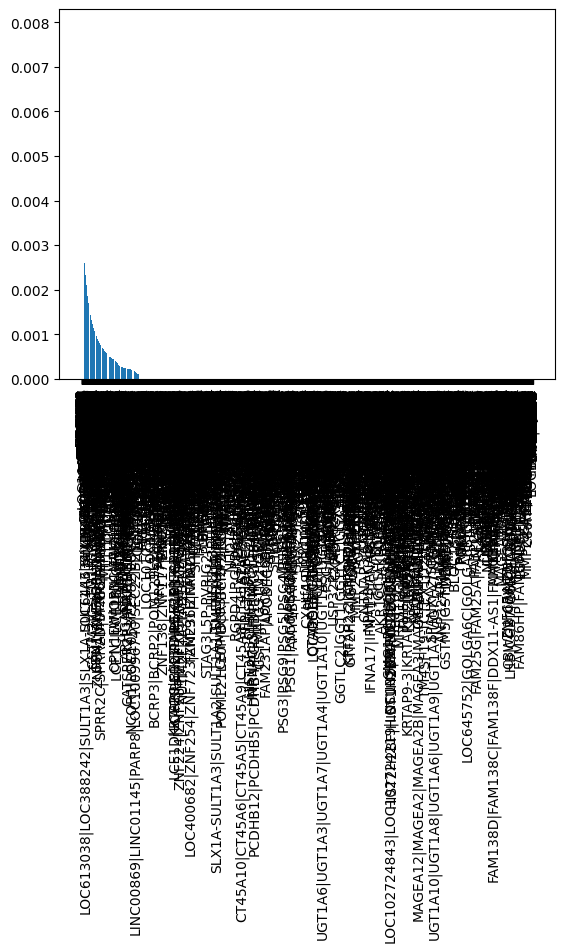

In [21]:
#let's find the most significant features using Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_scaled, y)
importances = rf.feature_importances_

#let's now find the most important features
indices = np.argsort(importances)[::-1]
features = X.columns
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
#saving the plot
plt.savefig('feature_importance_1.png')

plt.show()


In [22]:
feat_imp_death = pd.DataFrame({'feature':features, 
                         'importance':importances}).sort_values(by='importance', ascending=False)

top20_death = feat_imp_death[:50]

print(top20_death)

                feature  importance
7101               RFX6    0.007897
3083             SMCHD1    0.007420
5656              OR8K3    0.006598
2763            PCDHB16    0.005642
7049           GOLGB1.1    0.005563
3525               BLNK    0.005392
177                EID3    0.005356
6068            TTC22.2    0.005117
9369           CDKN1A.2    0.004842
6804           SLC16A10    0.004785
9297              PLCL2    0.004740
35                 TNS2    0.004478
1127             PCDH20    0.004476
3060              PLPP2    0.004299
5875     LOC100506747.1    0.004256
8075             UBE2V2    0.004185
5031             NOB1.1    0.004166
1581               TGM2    0.004072
2186              ITFG1    0.003992
691                 SYK    0.003847
413              FNDC3B    0.003743
7691              MIP.2    0.003595
1553          KRTAP24-1    0.003554
2571           CYB5D2.1    0.003547
2375               DLG5    0.003394
6864            GPNMB.1    0.003327
431                NT5E    0

# Important Note
Sample 200 (NB401) has a lot of GeneSymbols with negative expression. This does not allow me to perform chi2 therefore I dropped the row.

In [23]:
# (COMPLETELY OPTIONAL) Code to show that we have the line with a lot of negative values.
# Assuming df is your DataFrame
negative_value_indices = np.where(X < 0)
rows_with_negative_values = negative_value_indices[0]
cols_with_negative_values = negative_value_indices[1]

# To see the indices paired as (row, column), you can use the zip function
paired_indices = list(zip(rows_with_negative_values, cols_with_negative_values))
print(paired_indices)
# Assuming X is your DataFrame
column_names = X.columns

# Now, to get the column names for the columns with negative values, you can use:
negative_column_names = column_names[cols_with_negative_values]

print(negative_column_names)

[(200, 287), (200, 434), (200, 522), (200, 1113), (200, 1166), (200, 1219), (200, 1493), (200, 1614), (200, 1751), (200, 1766), (200, 1871), (200, 2031), (200, 2278), (200, 2417), (200, 2460), (200, 2504), (200, 2522), (200, 2627), (200, 2708), (200, 2918), (200, 3264), (200, 3490), (200, 3802), (200, 3985), (200, 4016), (200, 4088), (200, 4111), (200, 4276), (200, 4294), (200, 4365), (200, 4402), (200, 4444), (200, 4476), (200, 4520), (200, 4866), (200, 4896), (200, 5012), (200, 5144), (200, 5212), (200, 5265), (200, 5383), (200, 5600), (200, 5645), (200, 6099), (200, 6105), (200, 6125), (200, 6127), (200, 6390), (200, 6918), (200, 6991), (200, 6996), (200, 7319), (200, 7438), (200, 7626), (200, 7683), (200, 7740), (200, 7780), (200, 7808), (200, 7989), (200, 8185), (200, 9003), (200, 9278), (200, 9309), (200, 9430), (200, 9437), (200, 9442), (200, 9490), (200, 9597), (200, 9610), (200, 9724), (200, 9761), (200, 9774)]
Index(['TMEM9', 'DROSHA', 'OLFML2B', 'FUCA2', 'GTF3C6', 'SLC35F1',

In [24]:
# Execute X.Drop index 200 when needed.
column_name = X.columns[287]
print(column_name)


X.drop(index=200, inplace=True)
y.drop(index=200, inplace=True)
X.shape

TMEM9


(248, 9848)

In [25]:
#importing libraries
from scipy import stats 
from sklearn.feature_selection import f_classif, chi2
f_values, p_values = f_classif(X, y)
chi2_values, p_chi2_values = chi2(X, y)

f_results = pd.DataFrame({'feature':X.columns, 
                          'f_value':f_values, 
                          'p_value':p_values})

chi2_results = pd.DataFrame({'feature':X.columns,  
                             'chi2':chi2_values,
                             'p_chi2':p_chi2_values})

f_results.sort_values(by='p_value', ascending=True) 
chi2_results.sort_values(by='p_chi2', ascending=True)

,feature,chi2,p_chi2
4794,TTTY6|TTTY6B,4.692388e+01,7.379817e-12
7049,GOLGB1.1,3.924860e+01,3.731350e-10
2282,CD69.1,3.007805e+01,4.150013e-08
5958,NARS.1,2.714410e+01,1.888402e-07
941,HAO1,2.572863e+01,3.929545e-07
...,...,...,...
8129,SH2D3C,4.801482e-07,9.994471e-01
6029,WASHC5.2,2.770724e-07,9.995800e-01
2560,EPB41L4A-DT,2.004458e-07,9.996428e-01
1548,MRPS26,1.844260e-07,9.996573e-01


In [26]:
f_results.sort_values(by='p_value', ascending=True, inplace=True)
chi2_results.sort_values(by='p_chi2', ascending=True, inplace=True)

f_top20 = f_results.head(20)  
chi2_top20 = chi2_results.head(20)

f_features = list(f_top20['feature'])
chi2_features = list(chi2_top20['feature'])

chi2_features

['TTTY6|TTTY6B',
 'GOLGB1.1',
 'CD69.1',
 'NARS.1',
 'HAO1',
 'EZH2',
 'SLC5A4-AS1|CPSF1',
 'PUM1.3',
 'OSR2',
 'FGR',
 'KRTAP24-1',
 'TENM3-AS1',
 'ELOC.1',
 'NIPBL',
 'PGK1.3',
 'FUCA1',
 'NFS1',
 'BORCS8-MEF2B|BORCS8',
 'CASKIN1|TRAF7',
 'RAB11FIP3']

# Death prediction

### Logistic regression

In [77]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#First, let's split the data into features and target

# Columns to remove
cols_to_drop = ['ID', 'sex', 'age','death', 'high risk', 'INSS', 'progression'] 

# Drop columns
X = merged_df.drop(cols_to_drop, axis=1)  
y = merged_df['death'] 
# Dropping values from NB401
X.drop(index=200, inplace=True)
y.drop(index=200, inplace=True)
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Creating a logistic regression model
model = LogisticRegression(max_iter=1000)

#Training the model on the training data
model.fit(X_train, y_train)

#Making predictions on the test data
y_pred = model.predict(X_test)

#Checking the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        42
           1       0.38      0.38      0.38         8

    accuracy                           0.80        50
   macro avg       0.63      0.63      0.63        50
weighted avg       0.80      0.80      0.80        50



### Accuracy
The accuracy of the model is 88%. 

Let's look at the confusion matrix and ROC curve.

Prediction counts: {0: 42, 1: 8}
Test counts: {0: 42, 1: 8}
Accuracy: 0.8
Shape of confusion matrix: (2, 2)


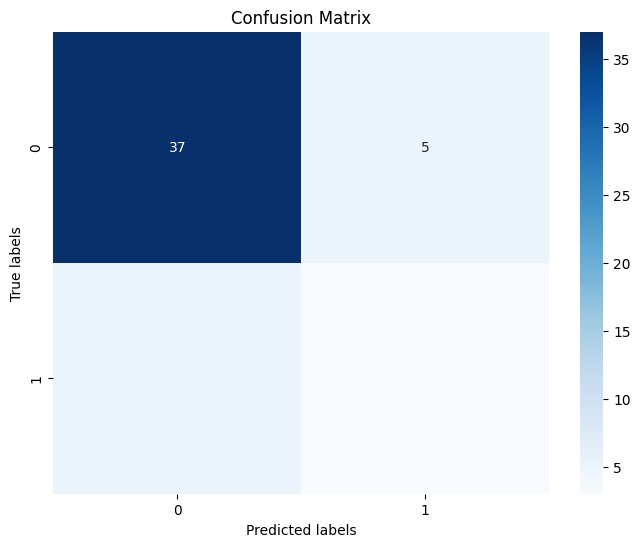

In [28]:
#importing libraries
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

# Verifying the prediction array
unique, counts = np.unique(y_pred, return_counts=True)
print("Prediction counts:", dict(zip(unique, counts)))
unique, counts = np.unique(y_test, return_counts=True)
print("Test counts:", dict(zip(unique, counts)))
#Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Explicitly define the labels
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Checking the shape of the confusion matrix
print("Shape of confusion matrix:", cm.shape)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

#saving the plot
plt.savefig('confusion_matrix_logreg_death.png')

plt.show()

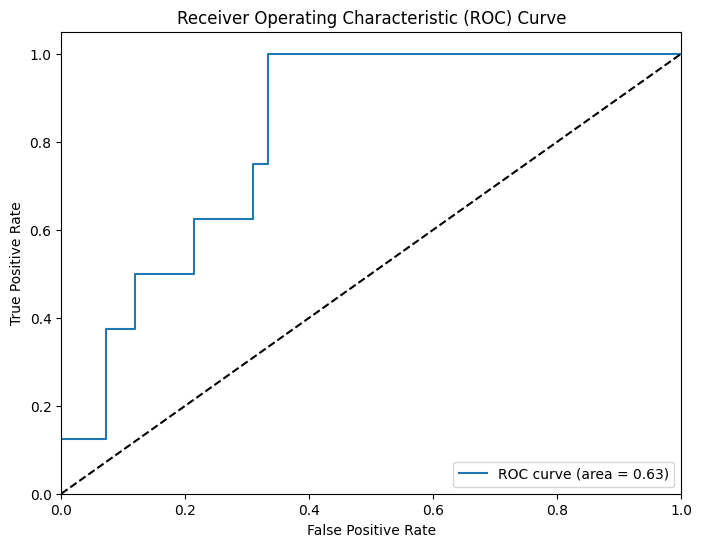

In [29]:
### ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

#saving the plot
plt.savefig('roc_curve_logreg_death.png')

plt.show()

### Tree classifier model


In [78]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


# Columns to remove
cols_to_drop = ['ID', 'sex', 'age','death', 'high risk', 'INSS', 'progression'] 

# Drop columns
X = merged_df.drop(cols_to_drop, axis=1)  
y = merged_df['death'] 
# Dropping values from NB401
X.drop(index=200, inplace=True)
y.drop(index=200, inplace=True)

#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Creating the decision tree model
tree_model = DecisionTreeClassifier()
#Training the model
tree_model.fit(X_train, y_train)
#Making predictions on the test data
y_pred = tree_model.predict(X_test)
#Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

X.shape

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        42
           1       0.50      0.62      0.56         8

    accuracy                           0.84        50
   macro avg       0.71      0.75      0.73        50
weighted avg       0.86      0.84      0.85        50



(248, 9848)

### Tree classifier Accuracy
Accuracy: 0.76

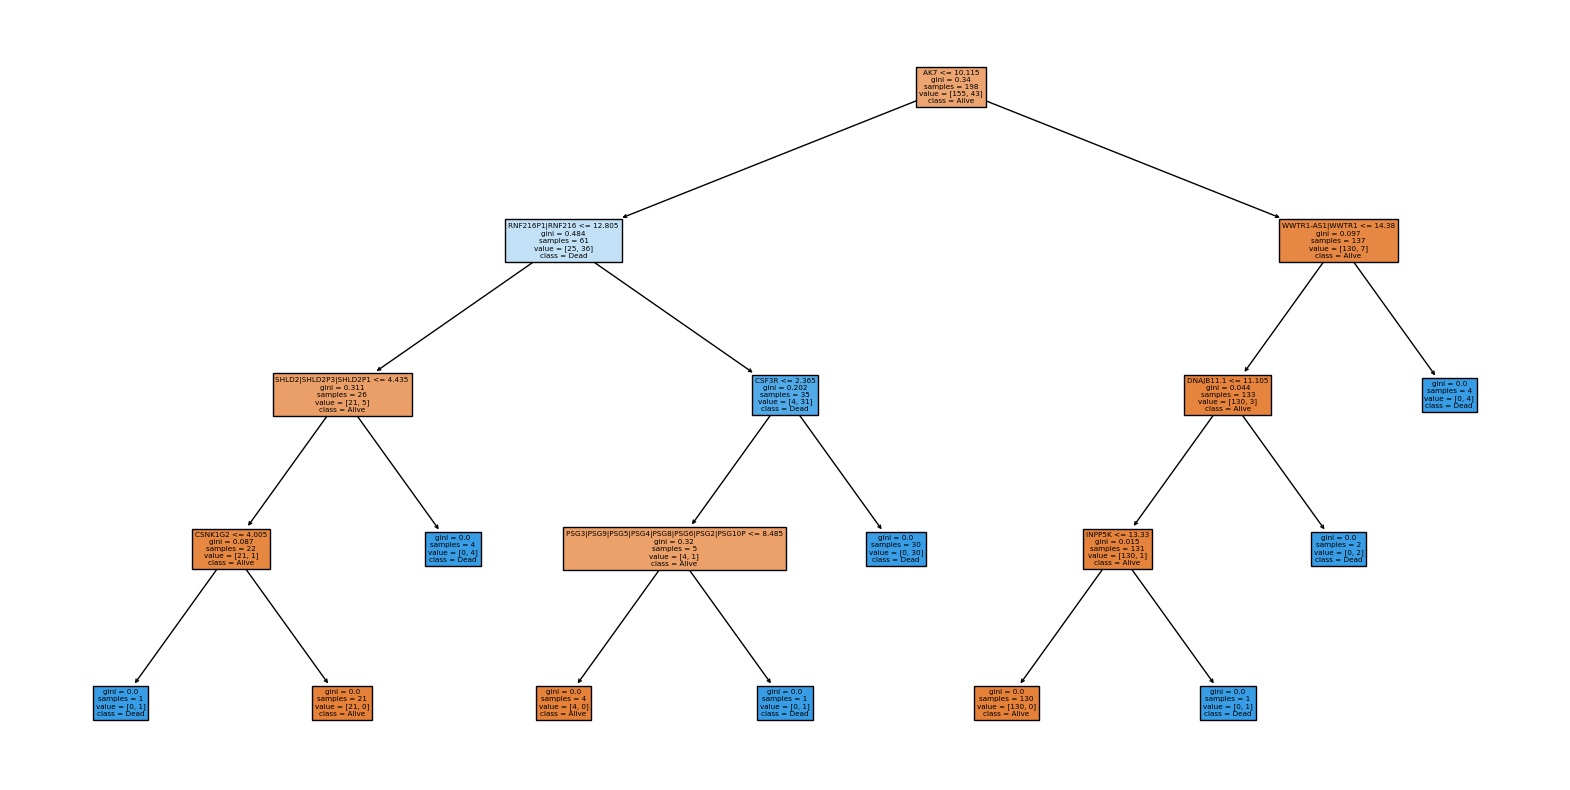

In [31]:
#Plotting the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=['Alive', 'Dead'])

#saving the plot
plt.savefig('decision_tree_death.png')

plt.show()

### Vector classifier

In [81]:
from sklearn.preprocessing import StandardScaler


# Columns to remove
cols_to_drop = ['ID', 'sex', 'age','death', 'high risk', 'INSS', 'progression'] 

# Drop columns
X = merged_df.drop(cols_to_drop, axis=1)  
y = merged_df['death'] 
# Dropping values from NB401
X.drop(index=200, inplace=True)
y.drop(index=200, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)
y_pred = svc_model.predict(X_test_scaled)


# Verifying the prediction array
unique, counts = np.unique(y_pred, return_counts=True)
print("Prediction counts:", dict(zip(unique, counts)))
unique, counts = np.unique(y_test, return_counts=True)
print("Test counts:", dict(zip(unique, counts)))

#Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Prediction counts: {0: 47, 1: 3}
Test counts: {0: 42, 1: 8}
Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        42
           1       0.33      0.12      0.18         8

    accuracy                           0.82        50
   macro avg       0.59      0.54      0.54        50
weighted avg       0.77      0.82      0.78        50



### Vector classifier accuracy
Accuracy: 0.84

# High risk prediction

In [106]:
#First, let's split the data into features and target
# Columns to remove
cols_to_drop = ['ID', 'sex', 'age','death', 'INSS', 'progression', 'high risk'] 

# Drop columns
X = merged_df.drop(cols_to_drop, axis=1)  
y = merged_df['high risk']  

# Dropping values from NB401
X.drop(index=200, inplace=True)
y.drop(index=200, inplace=True)



In [107]:
#let's now scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

cols_to_drop = ['ID', 'sex', 'age','death', 'INSS', 'progression', 'high risk'] 

# Drop columns
X = merged_df.drop(cols_to_drop, axis=1)  
y = merged_df['high risk']  

# Dropping values from NB401
X.drop(index=200, inplace=True)
y.drop(index=200, inplace=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

logmodel_risk = LogisticRegression(max_iter=1000)
logmodel_risk.fit(X_train, y_train)

y_pred = logmodel_risk.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        34
           1       0.83      0.94      0.88        16

    accuracy                           0.92        50
   macro avg       0.90      0.92      0.91        50
weighted avg       0.93      0.92      0.92        50

Accuracy: 0.92


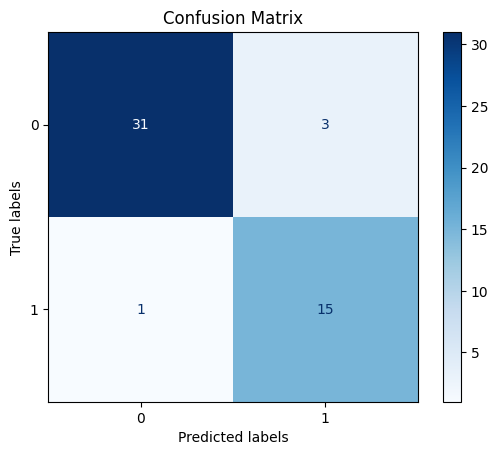

Prediction counts: {0: 32, 1: 18}
Test counts: {0: 34, 1: 16}
Accuracy: 0.92


In [108]:
#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot(cmap='Blues')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save the plot
plt.savefig('confusion_matrix_logreg_risk.png')

# Show the plot
plt.show()
# Verifying the prediction array
unique, counts = np.unique(y_pred, return_counts=True)
print("Prediction counts:", dict(zip(unique, counts)))
unique, counts = np.unique(y_test, return_counts=True)
print("Test counts:", dict(zip(unique, counts)))
#Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

### High Risk ROC

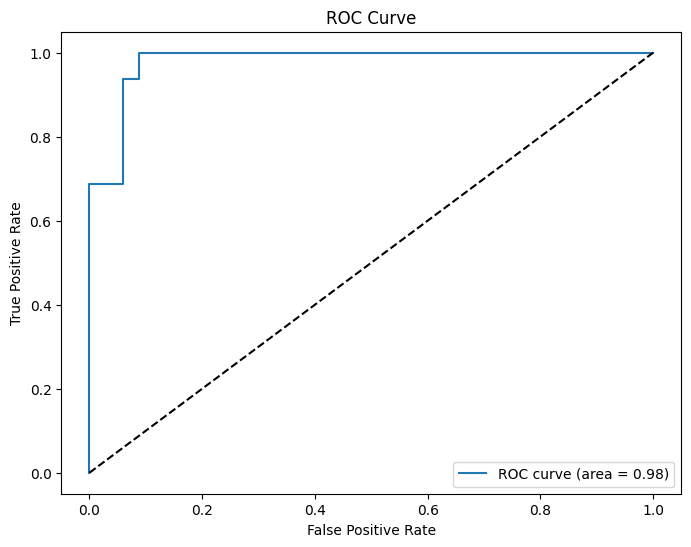

In [109]:
# Calculate ROC curve and AUC
y_pred_proba = logmodel_risk.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
#Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

#saving the plot
plt.savefig('roc_curve_logreg_risk.png')

plt.show()

In [38]:
#Evaluating the model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        34
           1       0.83      0.94      0.88        16

    accuracy                           0.92        50
   macro avg       0.90      0.92      0.91        50
weighted avg       0.93      0.92      0.92        50



### Decision tree

In [83]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

#reading the merged data as a dataframe
merged_df = pd.read_csv('merged.tsv', sep='\t')
#renaming the columns in merged.tsv to make them readable
column_map = {'FactorValue..Sex.': 'sex',
             'FactorValue..age.at.diagnosis.': 'age',
             'FactorValue..death.from.disease.': 'death',
             'FactorValue..high.risk.': 'high risk',
             'FactorValue..inss.stage.': 'INSS',
             'FactorValue..progression.': 'progression'}
merged_df = merged_df.rename(columns=column_map)
#dropping an extra column that was generated
merged_df = merged_df.drop(['Unnamed: 0'], axis=1)

#replacing male with 1 and female with 0
merged_df['sex'] = merged_df['sex'].replace({'male': 1, 'female': 0})

cols_to_drop = ['ID', 'sex', 'age','death', 'INSS', 'progression', 'high risk'] 

# Drop columns
X = merged_df.drop(cols_to_drop, axis=1)  
y = merged_df['high risk']  

# Dropping values from NB401
X.drop(index=200, inplace=True)
y.drop(index=200, inplace=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#Creating a decision tree model
treemodel_risk = DecisionTreeClassifier()

#Training the model
treemodel_risk.fit(X_train, y_train)

#Making predictions
y_pred = treemodel_risk.predict(X_test)

#Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        34
           1       0.71      0.75      0.73        16

    accuracy                           0.82        50
   macro avg       0.79      0.80      0.80        50
weighted avg       0.82      0.82      0.82        50



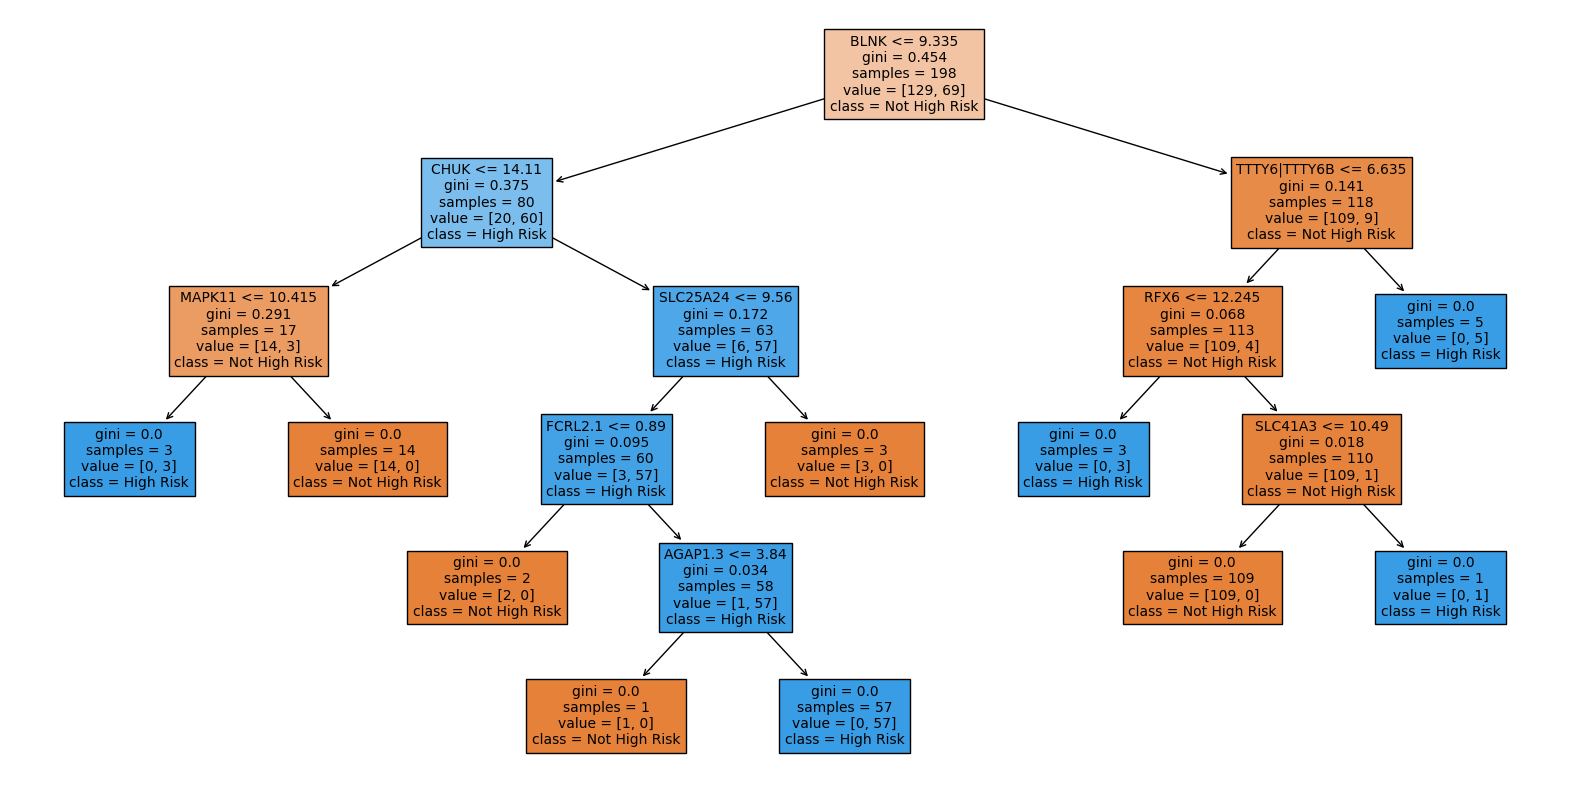

In [40]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#Creating a figure and set its size
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(treemodel_risk, feature_names=X.columns, class_names=['Not High Risk', 'High Risk'], filled=True, fontsize=10)

# Saving the plot
plt.savefig('decision_tree_risk.png')

# Display the plot
plt.show()

### High Risk SVC

In [85]:
#loading libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

cols_to_drop = ['ID', 'sex', 'age','death', 'INSS', 'progression', 'high risk'] 

# Drop columns
X = merged_df.drop(cols_to_drop, axis=1)  
y = merged_df['high risk']  

# Dropping values from NB401
X.drop(index=200, inplace=True)
y.drop(index=200, inplace=True)

#Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)
y_pred = svc_model.predict(X_test_scaled)


# Verifying the prediction array
unique, counts = np.unique(y_pred, return_counts=True)
print("Prediction counts:", dict(zip(unique, counts)))
unique, counts = np.unique(y_test, return_counts=True)
print("Test counts:", dict(zip(unique, counts)))

#Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#Printing the classification report
print(classification_report(y_test, y_pred))

Prediction counts: {0: 53, 1: 22}
Test counts: {0: 52, 1: 23}
Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        52
           1       0.82      0.78      0.80        23

    accuracy                           0.88        75
   macro avg       0.86      0.85      0.86        75
weighted avg       0.88      0.88      0.88        75



# Progression prediction

In [42]:
X = merged_df.drop('progression', axis=1)
# Columns to remove
cols_to_drop = ['ID', 'sex', 'age','death', 'high risk', 'INSS', 'progression'] 

# Drop columns
X = merged_df.drop(cols_to_drop, axis=1)  
y = merged_df['progression']  

X.drop(index=200, inplace=True)
y.drop(index=200, inplace=True)

In [87]:
#normalizing the data
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
#splitting the data into train and test

cols_to_drop = ['ID', 'sex', 'age','death', 'high risk', 'INSS', 'progression'] 

# Drop columns
X = merged_df.drop(cols_to_drop, axis=1)  
y = merged_df['progression']  

X.drop(index=200, inplace=True)
y.drop(index=200, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Creating a logistic regression model
logreg_progression_model = LogisticRegression(max_iter=1000)

#Training the model on the training data
logreg_progression_model.fit(X_train, y_train)

#Making predictions on the test data
y_pred = logreg_progression_model.predict(X_test)

#Checking the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#Printing the classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        47
           1       0.65      0.61      0.63        28

    accuracy                           0.73        75
   macro avg       0.71      0.71      0.71        75
weighted avg       0.73      0.73      0.73        75



### Progression Confusion Matrix

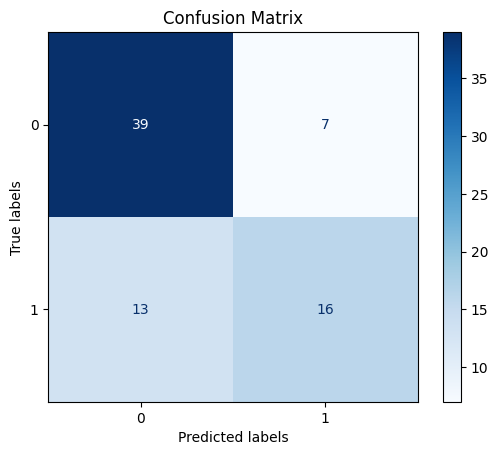

In [44]:
#Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)


# Plot the confusion matrix
disp.plot(cmap='Blues')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save the plot
plt.savefig('confusion_matrix_logreg_risk.png')

# Show the plot
plt.show()

### Progression ROC

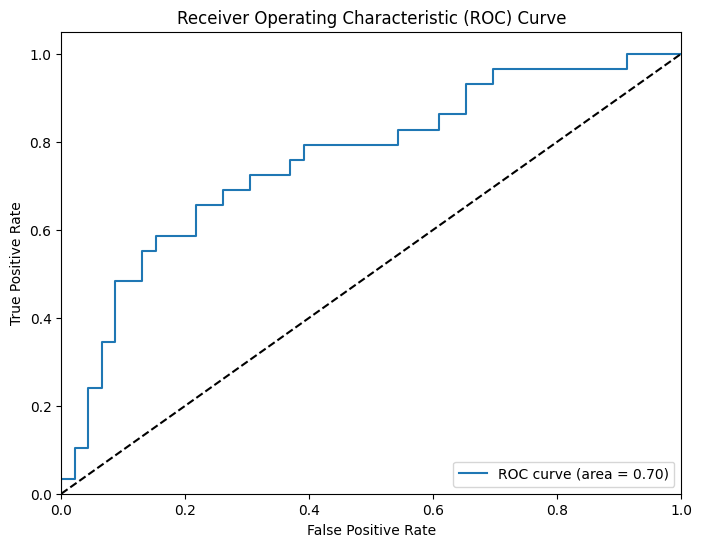

In [45]:
#Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logreg_progression_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

#saving the plot
plt.savefig('roc_curve_logreg_progression.png')

plt.show()

### Progression Performance evaluation

In [46]:
#Evaluating the model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80        46
           1       0.70      0.55      0.62        29

    accuracy                           0.73        75
   macro avg       0.72      0.70      0.71        75
weighted avg       0.73      0.73      0.73        75



### Progression Decision tree

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        31
           1       0.53      0.47      0.50        19

    accuracy                           0.64        50
   macro avg       0.61      0.61      0.61        50
weighted avg       0.63      0.64      0.64        50



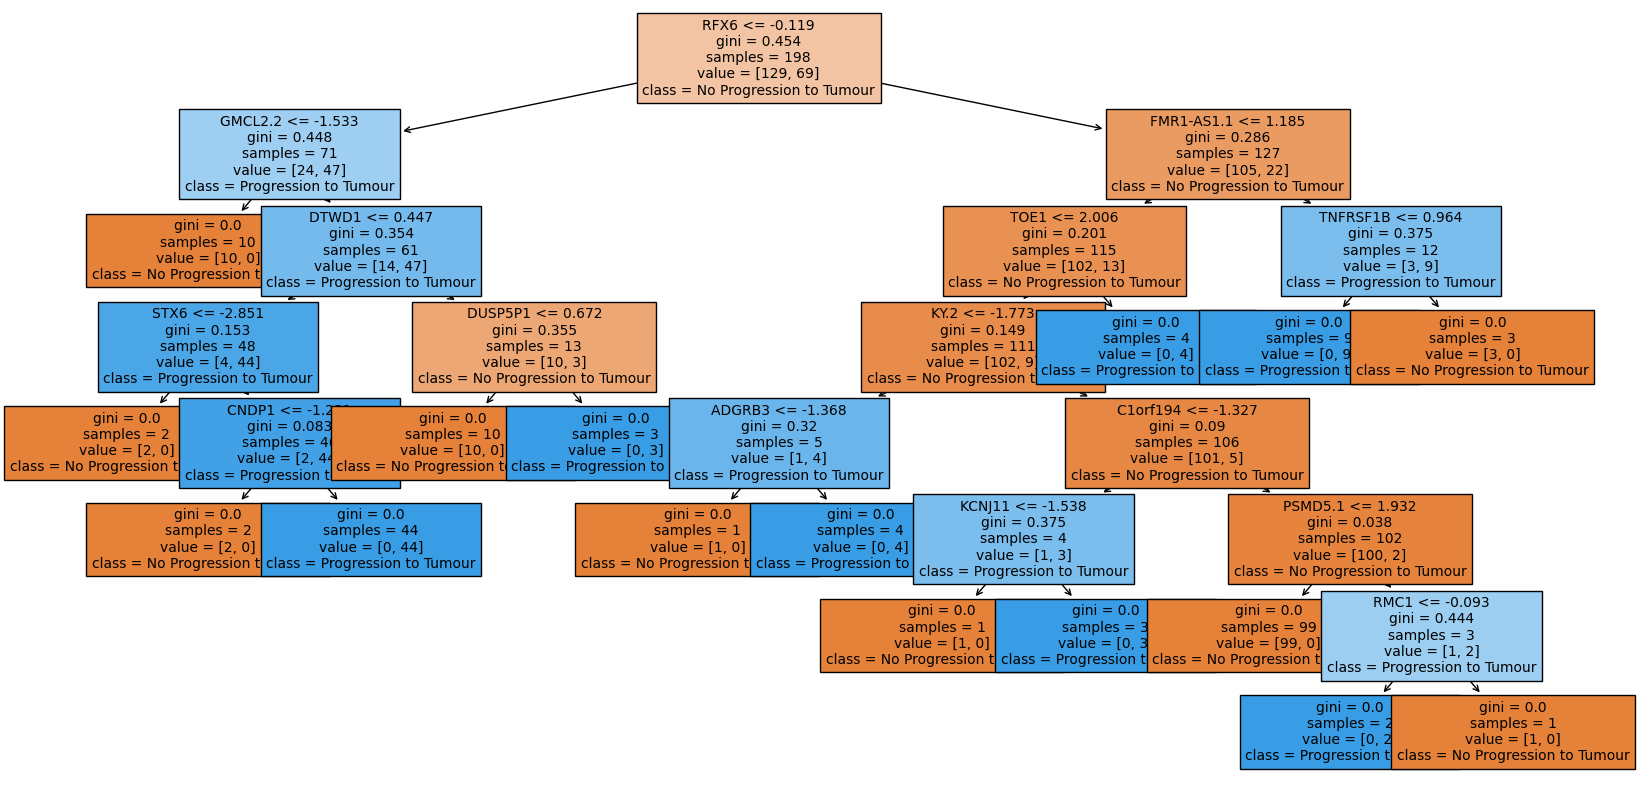

In [90]:

cols_to_drop = ['ID', 'sex', 'age','death', 'high risk', 'INSS', 'progression'] 

# Drop columns
X = merged_df.drop(cols_to_drop, axis=1)  
y = merged_df['progression']  

X.drop(index=200, inplace=True)
y.drop(index=200, inplace=True)

#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

#Creating a decision tree model
treemodel_progression = DecisionTreeClassifier()

#Training the model
treemodel_progression.fit(X_train, y_train)

#Making predictions
y_pred = treemodel_progression.predict(X_test)

#Printing the classification report
print(classification_report(y_test, y_pred))

#Creating a figure and set its size
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(treemodel_progression, feature_names=X.columns, class_names=['No Progression to Tumour', 'Progression to Tumour'], filled=True, fontsize=10)

# Saving the plot
plt.savefig('decision_tree_risk.png')

# Display the plot
plt.show()

### Progression SVC

In [95]:
#loading libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report


cols_to_drop = ['ID', 'sex', 'age','death', 'high risk', 'INSS', 'progression'] 

# Drop columns
X = merged_df.drop(cols_to_drop, axis=1)  
y = merged_df['progression']  

X.drop(index=200, inplace=True)
y.drop(index=200, inplace=True)

#Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)
y_pred = svc_model.predict(X_test_scaled)


# Verifying the prediction array
unique, counts = np.unique(y_pred, return_counts=True)
print("Prediction counts:", dict(zip(unique, counts)))
unique, counts = np.unique(y_test, return_counts=True)
print("Test counts:", dict(zip(unique, counts)))

#Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#Printing the classification report
print(classification_report(y_test, y_pred))

Prediction counts: {0: 35, 1: 15}
Test counts: {0: 37, 1: 13}
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        37
           1       0.47      0.54      0.50        13

    accuracy                           0.72        50
   macro avg       0.65      0.66      0.65        50
weighted avg       0.73      0.72      0.73        50



# INSS Prediction

In [49]:
#grouping the INSS column and counting the values
merged_df['INSS'] = merged_df['INSS'].replace(['1', '2', '3', '4', '1', '2', '3', '4', '4S'], [1, 2, 3, 4, 1, 2, 3, 4, 5])
merged_df['INSS'].groupby(merged_df['INSS']).count()

INSS
1    60
2    40
3    30
4    91
5    28
Name: INSS, dtype: int64

In [115]:
cols_to_drop = ['ID', 'sex', 'age','death', 'high risk', 'INSS', 'progression'] 

# Drop columns
X = merged_df.drop(cols_to_drop, axis=1)  
y = merged_df['INSS']  

X.drop(index=200, inplace=True)
y.drop(index=200, inplace=True)

#let's now scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Splitting the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Initialize the Random Forest Classifier
rf_classifier_INSS = RandomForestClassifier(n_estimators=100, random_state=1)
# Train the model on the training data
rf_classifier_INSS.fit(X_train, y_train)
# Make predictions on the test data
y_pred = rf_classifier_INSS.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# Print the classification report
print(classification_report(y_test, y_pred))

y

Accuracy: 0.52
              precision    recall  f1-score   support

           1       0.36      0.82      0.50        11
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         9
           4       0.73      0.94      0.82        17
          4S       1.00      0.33      0.50         3

    accuracy                           0.52        50
   macro avg       0.42      0.42      0.36        50
weighted avg       0.39      0.52      0.42        50



/Users/danteperea/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danteperea/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danteperea/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0       4
1       4
2       4
3       4
4      4S
       ..
244     4
245     4
246     1
247     1
248     1
Name: INSS, Length: 248, dtype: object

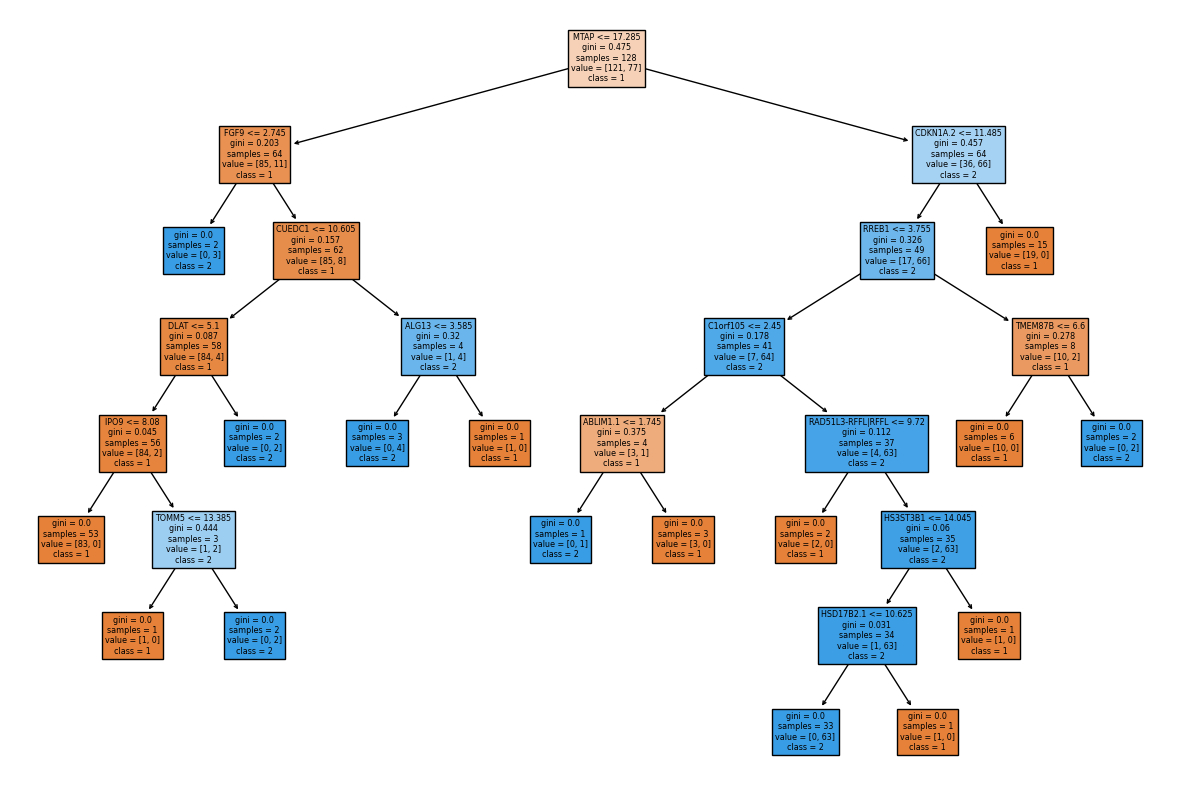

Index(['MBL1P', 'STK24', 'ARPC5', 'TSPAN15', 'PADI2', 'IFT81', 'CENPP',
       'SNRPD1', 'ICAM5', 'PTPN14',
       ...
       'GRAP2', 'NIM1K', 'DPH7', 'GDF6', 'IL18BP.1', 'PTPN18', 'PRSS53',
       'CLIC4.1', 'PDE3B', 'LINC01588'],
      dtype='object', length=9848)


In [105]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming rf_classifier_INSS is your trained Random Forest model
# Let's choose the first tree in the ensemble
tree_to_plot = rf_classifier_INSS.estimators_[0]

# Plot the tree
plt.figure(figsize=(15, 10))
plot_tree(tree_to_plot, filled=True, feature_names=X.columns, class_names=['1', '2', '3', '4', '5'])
plt.show()

print(X.columns)

Accuracy: 0.44

Classification Report:
               precision    recall  f1-score   support

           1       0.33      0.27      0.30        11
           2       0.40      0.60      0.48        10
           3       0.30      0.33      0.32         9
           4       0.67      0.59      0.62        17
          4S       0.00      0.00      0.00         3

    accuracy                           0.44        50
   macro avg       0.34      0.36      0.34        50
weighted avg       0.43      0.44      0.43        50


Confusion Matrix:
 [[ 3  5  2  0  1]
 [ 2  6  0  2  0]
 [ 1  2  3  3  0]
 [ 2  1  4 10  0]
 [ 1  1  1  0  0]]


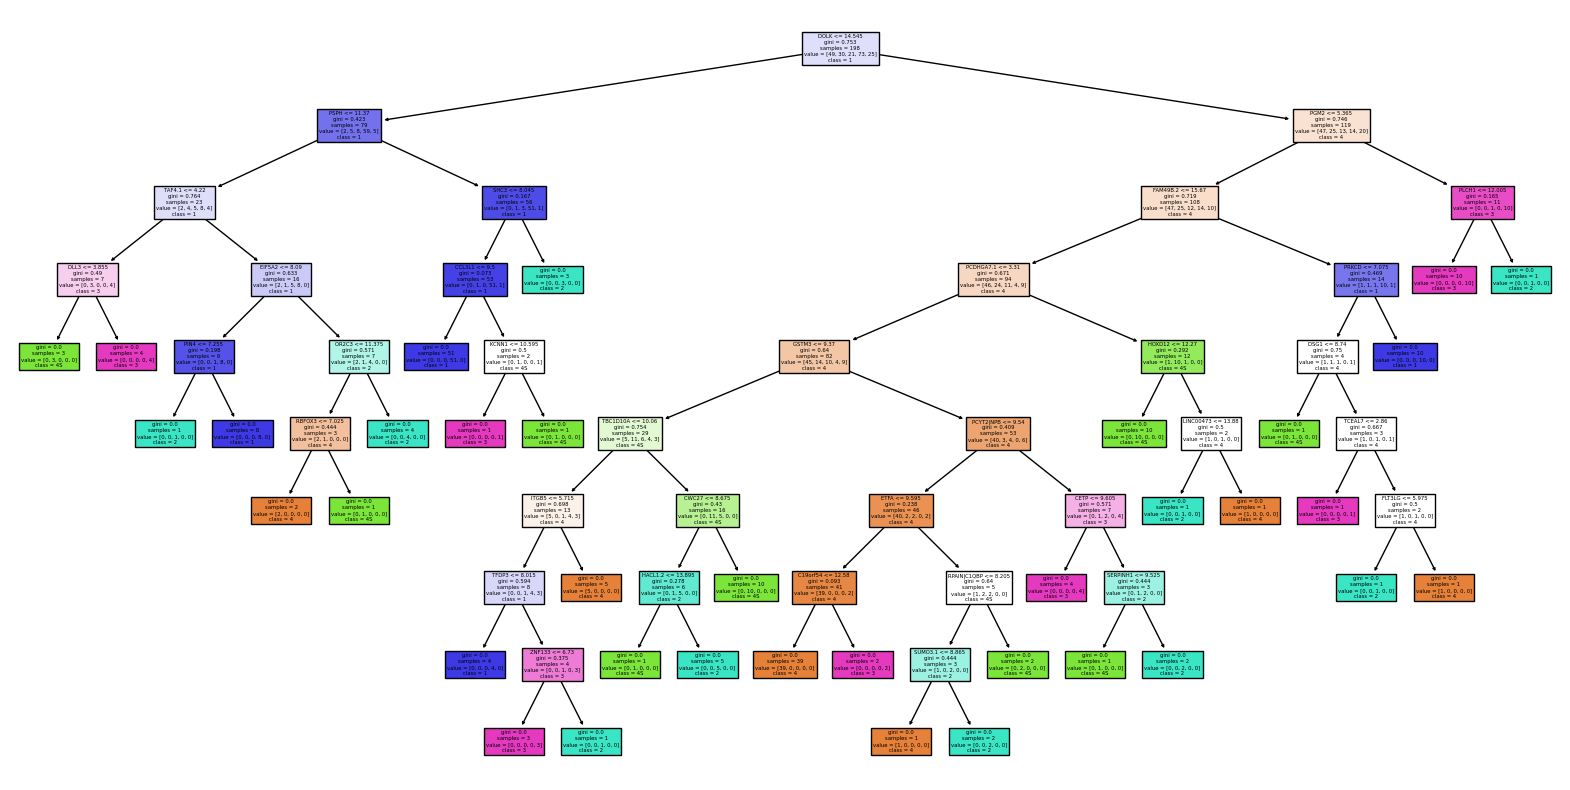

In [116]:
cols_to_drop = ['ID', 'sex', 'age','death', 'high risk', 'INSS', 'progression'] 

# Drop columns
X = merged_df.drop(cols_to_drop, axis=1)  
y = merged_df['INSS']  

X.drop(index=200, inplace=True)
y.drop(index=200, inplace=True)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Instantiate the Decision Tree Classifier
dt_classifier_INSS = DecisionTreeClassifier(random_state=42)

# Train the Classifier
dt_classifier_INSS.fit(X_train, y_train)

# Make Predictions
y_pred = dt_classifier_INSS.predict(X_test)

# Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualising the Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert y.unique() to strings
class_names = y.unique().astype(str)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier_INSS, filled=True, feature_names=X.columns, class_names=class_names)

#saving the plot
plt.savefig('decision_tree_INSS.png') 

plt.show()

In [117]:
cols_to_drop = ['ID', 'sex', 'age','death', 'high risk', 'INSS', 'progression'] 

# Drop columns
X = merged_df.drop(cols_to_drop, axis=1)  
y = merged_df['INSS']  

X.drop(index=200, inplace=True)
y.drop(index=200, inplace=True)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Instantiate the SVC
svc_classifier_INSS = SVC(kernel='rbf', random_state=1)

# Train the Classifier
svc_classifier_INSS.fit(X_train, y_train)

# Make Predictions
y_pred = svc_classifier_INSS.predict(X_test)

# Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.48

Classification Report:
               precision    recall  f1-score   support

           1       0.32      0.82      0.46        11
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         9
           4       0.68      0.88      0.77        17
          4S       0.00      0.00      0.00         3

    accuracy                           0.48        50
   macro avg       0.20      0.34      0.25        50
weighted avg       0.30      0.48      0.36        50



/Users/danteperea/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danteperea/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danteperea/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:

class Patient:
    def __init__(self, df):
        self.df = df

    def death_prediction(self):
        merged_df = self.df
        X = merged_df.drop('death', axis=1)
        # Columns to remove
        cols_to_drop = ['ID', 'sex', 'age','death', 'high risk', 'INSS', 'progression'] 

        # Drop columns
        X = merged_df.drop(cols_to_drop, axis=1)  
        y = merged_df['death']

        #splitting the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

        #Creating a logistic regression model
        model = LogisticRegression(max_iter=1000)

        #Training the model on the training data
        model.fit(X_train, y_train)

        #Making predictions on the test data
        y_pred = model.predict(X_test)

        #Checking the accuracy of the model
        accuracy = accuracy_score(y_test, y_pred)

        #I will add a code to populate the data frame
        # I will save the dataframe in tsv file // show dataframe
        print(f"Accuracy: {accuracy}")

        # 249 Death NaN
        # OUTCOME  DF 249 x 1 = [1,0,1,0,1]

        
    def save_tsv(df,y_pred,y_test)
        # all the logic to populate (merge) the dataframe with the values required

    def irss_prediction(self):
        merged_df = self.df

SyntaxError: expected ':' (4069870458.py, line 38)